In [2]:
import numpy as np
import pandas as pd
pdFires = pd.read_pickle("C:\\Users\\yangz\\Desktop\\FireProject\\pdFires.pkl")

x = np.zeros((1060, 6, 340, 444))
y = np.zeros((1060, 2))

count = 530
count2 = 0

for i in range (2541, 4531):
    polyAcres = pdFires.at[i, "poly_Acres"]
    if polyAcres < 40:
        continue
    
    detecFilePathPre = "C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Detection\\" + str(count) + "_" + str(pdFires.at[i, "poly_Incid"]) + "_Pre" + str(i) + ".npy"
    detecFilePathPost = "C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Detection\\" + str(count) + "_" + str(pdFires.at[i, "poly_Incid"]) + "_Post" + str(i) + ".npy"
    
    try:
        #print (detecFilePathPre)
        with open(detecFilePathPre, 'rb') as f1:
            detecPre = np.load(f1)
        with open(detecFilePathPost, 'rb') as f2:
            detecPost = np.load(f2)

        #detecPre = np.reshape(detecPre, (340, 444, 6))
        #detecPost = np.reshape(detecPost, (340, 444, 6))

        yPre = np.zeros((2))
        yPost = np.zeros((2))
        yPre[0] = 1
        yPost[1] = 1

        x[count2] = detecPre
        y[count2] = yPre
        count2+=1
        x[count2] = detecPost
        y[count2] = yPost
        count2+=1

        print ("Processed " + str(i))
        count += 1

    except:
        print ("Skipped " + str(i))
        continue


Processed 2541
Processed 2542
Processed 2545
Processed 2546
Skipped 2554
Processed 2556
Processed 2558
Processed 2562
Processed 2570
Processed 2573
Processed 2575
Processed 2578
Skipped 2582
Processed 2583
Processed 2584
Processed 2585
Skipped 2586
Processed 2587
Skipped 2589
Skipped 2590
Skipped 2592
Skipped 2599
Processed 2603
Processed 2604
Processed 2607
Processed 2608
Processed 2613
Processed 2615
Processed 2618
Processed 2625
Processed 2626
Processed 2632
Processed 2635
Processed 2637
Processed 2642
Skipped 2643
Processed 2645
Processed 2648
Processed 2655
Processed 2658
Processed 2660
Processed 2662
Processed 2665
Processed 2668
Processed 2674
Processed 2678
Processed 2679
Processed 2681
Processed 2684
Processed 2686
Processed 2692
Skipped 2696
Processed 2703
Processed 2706
Processed 2712
Processed 2713
Processed 2714
Processed 2715
Processed 2716
Processed 2718
Processed 2719
Processed 2737
Skipped 2740
Processed 2743
Processed 2747
Processed 2748
Processed 2750
Skipped 2751
Pr

Processed 4245
Processed 4246
Processed 4252
Processed 4254
Processed 4255
Processed 4256
Processed 4261
Processed 4262
Processed 4266
Skipped 4267
Processed 4269
Processed 4273
Processed 4274
Processed 4283
Skipped 4291
Processed 4294
Processed 4295
Skipped 4303
Processed 4306
Processed 4310
Processed 4313
Processed 4327
Processed 4333
Skipped 4335
Processed 4336
Skipped 4337
Processed 4339
Processed 4341
Processed 4345
Processed 4348
Processed 4349
Skipped 4350
Processed 4354
Processed 4357
Skipped 4359
Processed 4366
Skipped 4369
Skipped 4370
Processed 4385
Processed 4386
Processed 4387
Processed 4388
Processed 4391
Skipped 4397
Processed 4398
Processed 4399
Processed 4401
Processed 4406
Processed 4408
Processed 4412
Processed 4413
Skipped 4421
Processed 4428
Processed 4430
Processed 4431
Processed 4433
Processed 4436
Processed 4438
Processed 4442
Processed 4443
Processed 4445
Processed 4446
Skipped 4447
Processed 4448
Processed 4449
Processed 4459
Processed 4462
Skipped 4463
Proces

In [3]:
print (x.shape)

(1060, 6, 340, 444)


In [6]:
for each in x:
    NBR = each[0]
    NDVI = each[1]
    NDWI = each[2]
    B2 = each[3]
    B3 = each[4]
    B4 = each[5]
    
    NBR[NBR>1] = 0.6
    NBR[NBR<-1] = -0.6
    NBRmin = np.min(NBR)
    NBRmax = np.max(NBR)
    each[0] = (NBR-NBRmin)/(NBRmax-NBRmin)
    
    NDVI[NDVI>1] = 1
    NDVI[NDVI<-1] = -1
    NDVImin = np.min(NDVI)
    NDVImax = np.max(NDVI)
    each[1] = (NDVI-NDVImin)/(NDVImax-NDVImin)
    
    NDWI[NDWI>4] = 4
    NDWI[NDWI<-4] = -4
    NDWImin = np.min(NDWI)
    NDWImax = np.max(NDWI)
    each[2] = (NDWI-NDWImin)/(NDWImax-NDWImin)
    
    B2min = np.min(B2)
    B2max = np.max(B2)
    each[3] = (B2-B2min)/(B2max-B2min)
    
    B3min = np.min(B3)
    B3max = np.max(B3)
    each[4] = (B3-B3min)/(B3max-B3min)
    
    B4min = np.min(B4)
    B4max = np.max(B4)
    each[5] = (B4-B4min)/(B4max-B4min)
    
    

<ipython-input-6-d6a3bec2f039>:29: RuntimeWarning: invalid value encountered in true_divide
  each[3] = (B2-B2min)/(B2max-B2min)


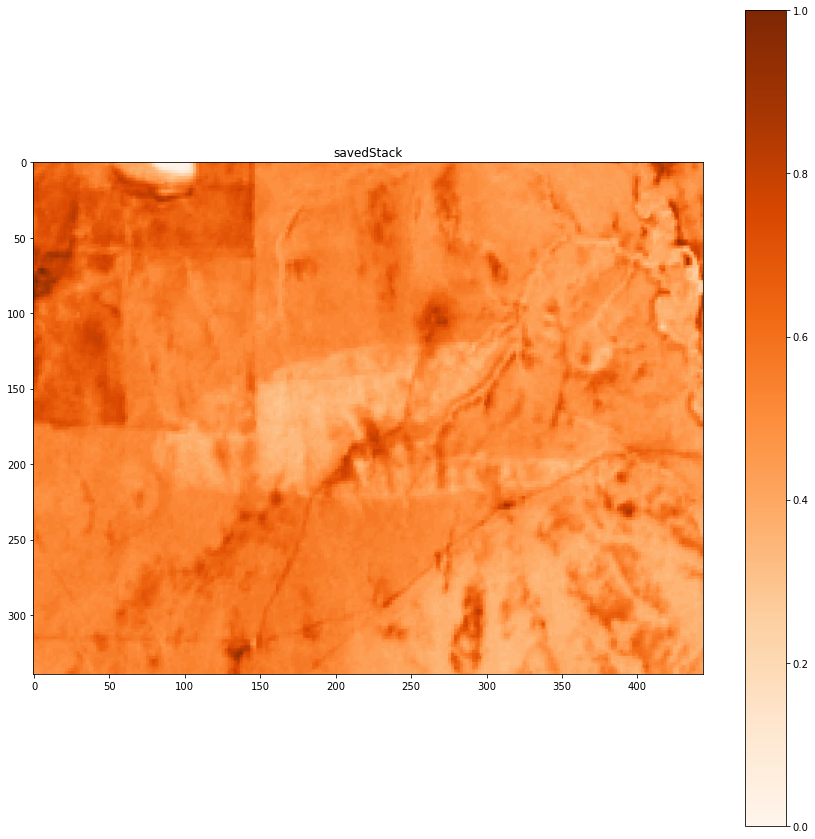

In [13]:
import matplotlib.pyplot as plt

img = x[1059]
img = np.reshape(img, (6, 340, 444))

fig = plt.figure(figsize=(15,15))
plt.imshow(img[5], cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("savedStack")
plt.colorbar()
plt.show()

In [14]:
print (np.sum(x))
x = np.nan_to_num(x)
print (np.mean(x))

nan
0.3927214748124629


In [15]:
path = "C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Detection1060-2120RescaledFiltered.npy"
np.save(path, x)


In [16]:
path = "C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Detection1060-2120RescaledFilteredY.npy"
np.save(path, y)
